In [1]:
import pandas as pd
import os
import numpy as np
import pandas as pd
import sklearn
import swifter
import numpy as np
import lightgbm
from sklearn.model_selection import train_test_split
import joblib
import scipy as sp
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../data/onti_p.csv")
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()

,Coolness_RHEED,Length_RHEED,R FWHM_RHEED,Speed_RHEED,Time_RHEED,X FWHM_RHEED,Y FWHM_RHEED,Crystal Position,Displayed Rate,Filtered Rate,Fundamental Freq,Length,Raw Rate,Source Power,Speed,Time
0,0.0,0.003721,0.0,0.0406,2021-02-23 02:21:05,0.0,0.0,1.0,6.027,6.000,inf,0.003721,5.990,21.64,NaN,2021-02-23 02:21:05
1,0.0,0.028870,0.0,0.4172,2021-02-23 02:21:06,0.0,0.0,1.0,6.070,6.094,inf,0.028870,6.110,21.06,NaN,2021-02-23 02:21:06
2,0.0,0.040400,0.0,0.5366,2021-02-23 02:21:07,0.0,0.0,1.0,6.156,6.082,inf,0.040400,6.168,20.97,NaN,2021-02-23 02:21:07
3,0.0,0.067750,0.0,0.7820,2021-02-23 02:21:08,0.0,0.0,1.0,6.110,6.168,inf,0.067750,6.156,20.70,NaN,2021-02-23 02:21:08
4,0.0,0.083560,0.0,0.8794,2021-02-23 02:21:09,0.0,0.0,1.0,6.094,6.168,inf,0.083560,6.145,20.60,NaN,2021-02-23 02:21:09


In [3]:
null_value_stats = df.isnull().sum(axis=0)
null_value_stats[null_value_stats != 0] /= df.shape[0]
null_value_stats[null_value_stats != 0]

Speed_RHEED         0.357798
Fundamental Freq    0.031651
Speed               0.549572
dtype: float64

In [4]:
df.drop(['Speed', 'Speed_RHEED', 'Fundamental Freq', 'Length_RHEED', 'Time_RHEED'], axis=1, inplace=True)

,Coolness_RHEED,R FWHM_RHEED,X FWHM_RHEED,Y FWHM_RHEED,Crystal Position,Displayed Rate,Filtered Rate,Length,Raw Rate,Source Power
Coolness_RHEED,1.000000,0.727862,0.743932,0.836942,0.109230,0.417966,0.419062,0.066965,0.207889,0.337766
R FWHM_RHEED,0.727862,1.000000,0.968505,0.940464,-0.011920,0.328371,0.329236,-0.024468,0.122989,0.339623
X FWHM_RHEED,0.743932,0.968505,1.000000,0.951568,0.004113,0.334661,0.335537,-0.023305,0.115511,0.357949
Y FWHM_RHEED,0.836942,0.940464,0.951568,1.000000,0.034261,0.345665,0.346575,0.009145,0.126334,0.366063
Crystal Position,0.109230,-0.011920,0.004113,0.034261,1.000000,-0.065419,-0.065491,0.845053,-0.063199,0.099469
Displayed Rate,0.417966,0.328371,0.334661,0.345665,-0.065419,1.000000,0.981212,-0.065063,0.486207,0.631023
Filtered Rate,0.419062,0.329236,0.335537,0.346575,-0.065491,0.981212,1.000000,-0.065182,0.486695,0.632677
Length,0.066965,-0.024468,-0.023305,0.009145,0.845053,-0.065063,-0.065182,1.000000,0.000928,0.077754
Raw Rate,0.207889,0.122989,0.115511,0.126334,-0.063199,0.486207,0.486695,0.000928,1.000000,-0.238467
Source Power,0.337766,0.339623,0.357949,0.366063,0.099469,0.631023,0.632677,0.077754,-0.238467,1.000000


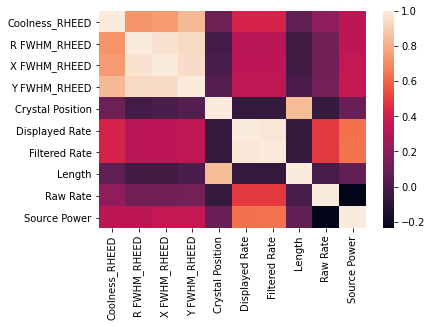

In [5]:
corr = df.corr()
sns.heatmap(data=corr)
corr

In [6]:
df.head()

,Coolness_RHEED,R FWHM_RHEED,X FWHM_RHEED,Y FWHM_RHEED,Crystal Position,Displayed Rate,Filtered Rate,Length,Raw Rate,Source Power,Time
0,0.0,0.0,0.0,0.0,1.0,6.027,6.000,0.003721,5.990,21.64,2021-02-23 02:21:05
1,0.0,0.0,0.0,0.0,1.0,6.070,6.094,0.028870,6.110,21.06,2021-02-23 02:21:06
2,0.0,0.0,0.0,0.0,1.0,6.156,6.082,0.040400,6.168,20.97,2021-02-23 02:21:07
3,0.0,0.0,0.0,0.0,1.0,6.110,6.168,0.067750,6.156,20.70,2021-02-23 02:21:08
4,0.0,0.0,0.0,0.0,1.0,6.094,6.168,0.083560,6.145,20.60,2021-02-23 02:21:09


In [7]:
df.to_csv('../data/onti_pc.csv', encoding='utf-8', index=False)